C:\Users\Aimpr\AppData\Local\Temp\ipykernel_32760\1495610512.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X,y
0,0.496714,0.449069
1,-0.138264,0.062332
2,0.647689,0.926527
3,1.523030,3.891975
4,-0.234153,0.363327


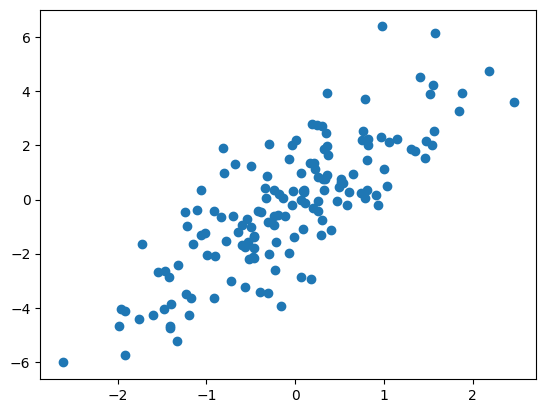

In [2]:
#https://www.youtube.com/watch?v=Q81RR3yKn30
#https://www.youtube.com/watch?v=NGf0voTMlcs


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


sample = 150
noise = np.random.randn(sample, 1) 
np.random.seed(42)
X = np.random.randn(sample, 1)
y = 2 * X + np.random.randn(sample, 1) + noise



plt.scatter(X, y)
datay = pd.DataFrame(y, columns=['y'])
datax = pd.DataFrame(X, columns=['X'])


concatenated_df = pd.concat([datax, datay], axis=1)
concatenated_df.head(5)


In [3]:
def Hx(X, W0, W1):
    y_pred = W0 + (W1*X)
    return y_pred


def costfunction(X, y, W0, W1, lamb):
    n = len(y)
    step0 = np.subtract(y, Hx(X, W0, W1))
    step1 = step0**2

    ridge = (lamb/2*n) * (np.sum(W1**2))

    step2 = step1 + ridge
    step3 = (1/(2 * n)) * np.sum(step2) 
    
    return step3

def gradient_ridge(interation, X, y, lamb):
    lr = 0.1
    W0 = 1 ##
    W1 = 1
    m = len(y)
    inter_b = []
    slo_w = []
    
    for _ in range(interation):

        step0 = Hx(X, W0, W1) 
        step1 = np.subtract(step0, y)
        
        cal_ridge = (lamb/m) * (W1)

        w_1 = step1 * X  #slope
        w_2 = w_1 + cal_ridge

        b = np.sum(step1) #inter

        w_3 = np.sum(w_2) * (1/m)
        b = b * (1/m)

        result_b = lr*(b)
        result_w = lr*(w_3)

        W0 -= result_b
        W1 -= result_w
        inter_b.append(W0)
        slo_w.append(W1)

    
    return inter_b, slo_w


0.12948226513181774
0.12911804182066636
0.12875567948096095


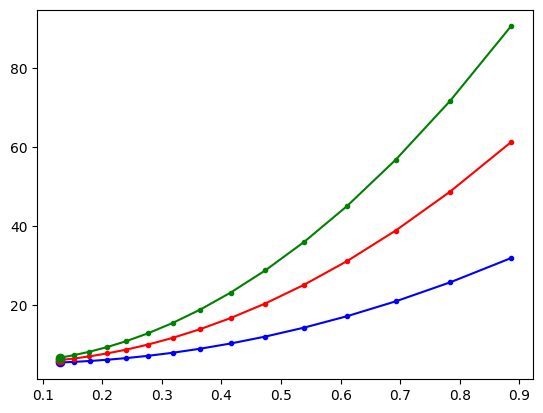

In [11]:
costf1 = []
costf2 = []
costf3 = []

interation = 15

sl, inter =  gradient_ridge(interation, X, y, 1)
sl2, inter2 =  gradient_ridge(interation, X, y, 2)
sl3, inter3 =  gradient_ridge(interation, X, y, 3)

for i in range(interation):
    data1 = costfunction(X, y, inter[i], sl[i], 1)
    data2 = costfunction(X, y, inter2[i], sl2[i], 2)
    data3 = costfunction(X, y, inter3[i], sl3[i], 3)
    costf1.append(data1)
    costf2.append(data2)
    costf3.append(data3)





plt.plot(sl,costf1, '-b.')
plt.plot(sl2,costf2, '-r.')
plt.plot(sl3,costf3, '-g.')

print(sl[-1])
print(sl2[-1])
print(sl3[-1])
plt.plot(sl[-1], min(costf1), 'bo')
plt.plot(sl2[-1], min(costf2), 'ro')
plt.plot(sl3[-1], min(costf3), 'go')

In [5]:
##Normal

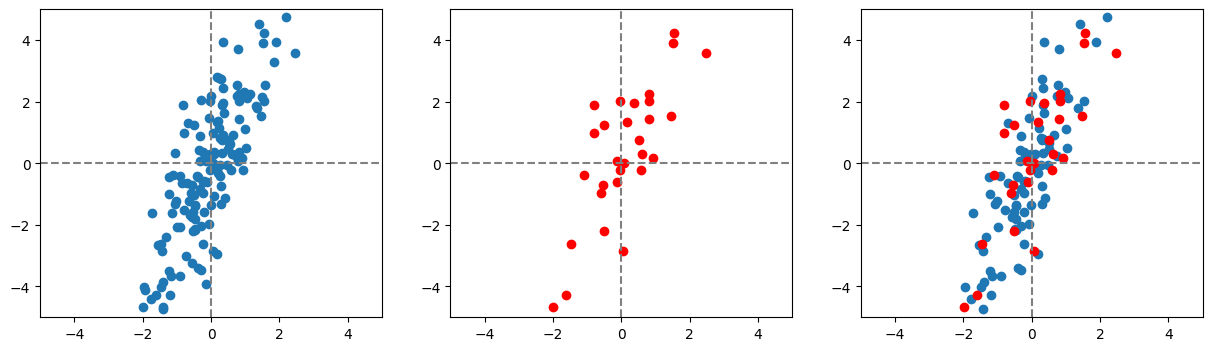

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

size = 0.2
ayx = -5,5

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X, y)
plt.xlim(ayx)  
plt.ylim(ayx) 
plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 

plt.subplot(1,3,2)
plt.scatter(X_val, y_val, color='red')
plt.xlim(ayx)  
plt.ylim(ayx) 
plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 

plt.subplot(1,3,3)
plt.scatter(X_train, y_train)
plt.scatter(X_val, y_val, color='red')
plt.xlim(ayx)  
plt.ylim(ayx) 
plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 


           0
0  -1.106335
1   0.611676
2  -0.115648
3   0.822545
4  -0.600639
5   1.549934
6  -0.035826
7  -1.607483
8   2.463242
9  -0.802277
10  0.821903
11 -0.518270
12 -0.501757
13 -1.463515
14  0.975545
15  0.171368
16 -0.034712
17  0.067528
18 -1.987569
19 -0.138264
20  0.513267
21 -0.808494
22 -0.544383
23  1.523030
24  0.813517
25  0.915402
26  0.357113
27  1.465649
28  0.060230
29  0.586857
           0
0  -2.524817
1   1.239842
2  -0.353936
3   1.701916
4  -1.416690
5   3.295837
6  -0.179023
7  -3.622978
8   5.297158
9  -1.858539
10  1.700508
11 -1.236197
12 -1.200012
13 -3.307501
14  2.037184
15  0.275000
16 -0.176581
17  0.047456
18 -4.455855
19 -0.403494
20  1.024200
21 -1.872160
22 -1.293417
23  3.236881
24  1.682134
25  1.905393
26  0.682019
27  3.111143
28  0.031464
29  1.185456


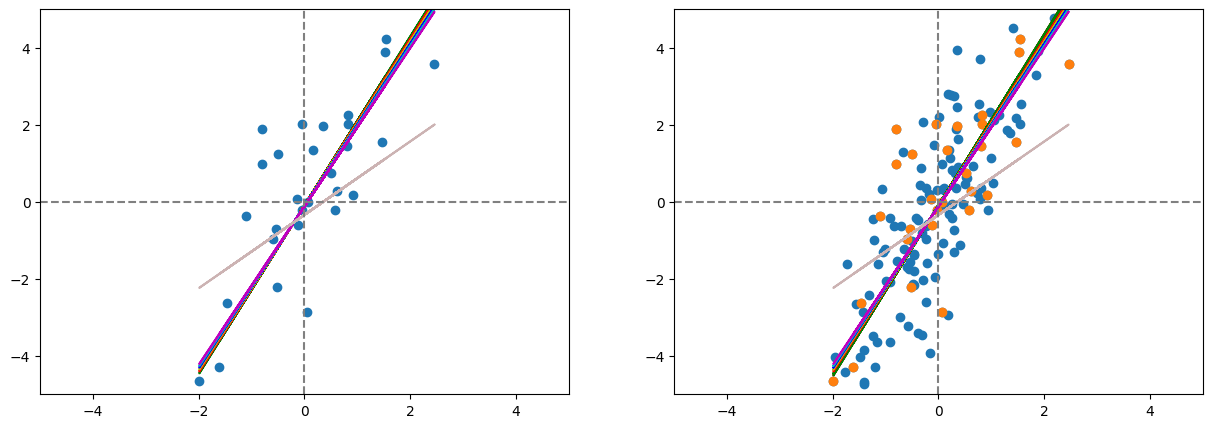

In [8]:
# Fit model1 on training data
from sklearn.linear_model import Ridge

ridgeout = []
for i in range(1,100):
    clf = Ridge(i)
    clf.fit(X_train, y_train)
    y_ridge = clf.predict(X_val)
    y_ridge_test = clf.predict(X_test)
    ridgeout.append(y_ridge)

ridge_re = np.array(ridgeout)
ridge_re = ridge_re.reshape(99,30)

r1 = ridge_re[:1].reshape(30,1)
r2 = ridge_re[1:2].reshape(30,1)
r3 = ridge_re[2:3].reshape(30,1)
r4 = ridge_re[3:4].reshape(30,1)
r5 = ridge_re[4:5].reshape(30,1)
r6 = ridge_re[5:6].reshape(30,1)

r9 = ridge_re[98:].reshape(30,1)


print(pd.DataFrame(X_val))
print(pd.DataFrame(r1))

model1 = LinearRegression()
model2 = LinearRegression()


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)



y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)


y_pred_test1 = model1.predict(X_test)
y_pred_test2 = model2.predict(X_test)



plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlim(ayx)  
plt.ylim(ayx)

# plt.plot(X_val, y_pred1, 'g')
plt.plot(X_val, r1, 'g')
plt.plot(X_val, r2, 'r')
plt.plot(X_val, r3, 'y')
plt.plot(X_val, r4, 'b')
plt.plot(X_val, r5, 'c')
plt.plot(X_val, r6, 'm')

plt.plot(X_val, r9, color=(0.8,0.7,0.7))





# plt.plot(X_test, y_pred_test1, 'r')
# plt.plot(X_test, y_ridge_test , 'b')

plt.scatter(X_val, y_val)

plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 


plt.subplot(1,2,2)

plt.xlim(ayx)  
plt.ylim(ayx)  
plt.plot(X_val, y_pred1, 'r')
plt.plot(X_val, y_pred2, 'g')
plt.plot(X_val, r1, 'g')
plt.plot(X_val, r2, 'r')
plt.plot(X_val, r3, 'y')
plt.plot(X_val, r4, 'b')
plt.plot(X_val, r5, 'c')
plt.plot(X_val, r6, 'm')

plt.plot(X_val, r9, color=(0.8,0.7,0.7))
plt.scatter(X, y)
plt.scatter(X_val, y_val)

plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 



In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import KFold, cross_val_score

R2_linear = []
R2_ridge = []
for i in range(20):
    kf = KFold(n_splits=10, random_state=i, shuffle=True)
    cross_val_linear = cross_val_score(model1, X, y, scoring='r2', cv=kf)
    cross_val_ridge = cross_val_score(clf, X, y, scoring='r2', cv=kf)
    output1 = np.mean(cross_val_linear)
    output2 = np.mean(cross_val_ridge)
    R2_linear.append(output1)
    R2_ridge.append(output2)



print(np.mean(R2_linear))
print(np.mean(R2_ridge),'\n')

print("MSE for Training linear:",mean_squared_error(y_val, y_pred1))
print("MSE for Training Ridge:",mean_squared_error(y_val, y_ridge),'\n')

print("MSE for Test linear:",mean_squared_error(y_test, y_pred_test1))
print("MSE for Test Ridge:",mean_squared_error(y_test, y_ridge_test))




0.5415716876961094
0.5431108733956604 

MSE for Training linear: 2.522805006792893
MSE for Training Ridge: 2.6430437271860474 

MSE for Test linear: 1.495651226594641
MSE for Test Ridge: 1.3370637000573888


521 2.8809439425056156 0.021000000000000463
511 2.889243710227546 0.011000000000000454
511 2.892034395274287 0.00700000000000045
505 2.8934588330743645 0.0050000000000004485
504 2.8943048882935796 0.004000000000000448
504 2.8949048882935804 0.004000000000000448
503 2.8952651677255807 0.0030000000000004468
503 2.8956026677255804 0.0030000000000004468
500 2.8977063512982886 4.440892098500626e-16


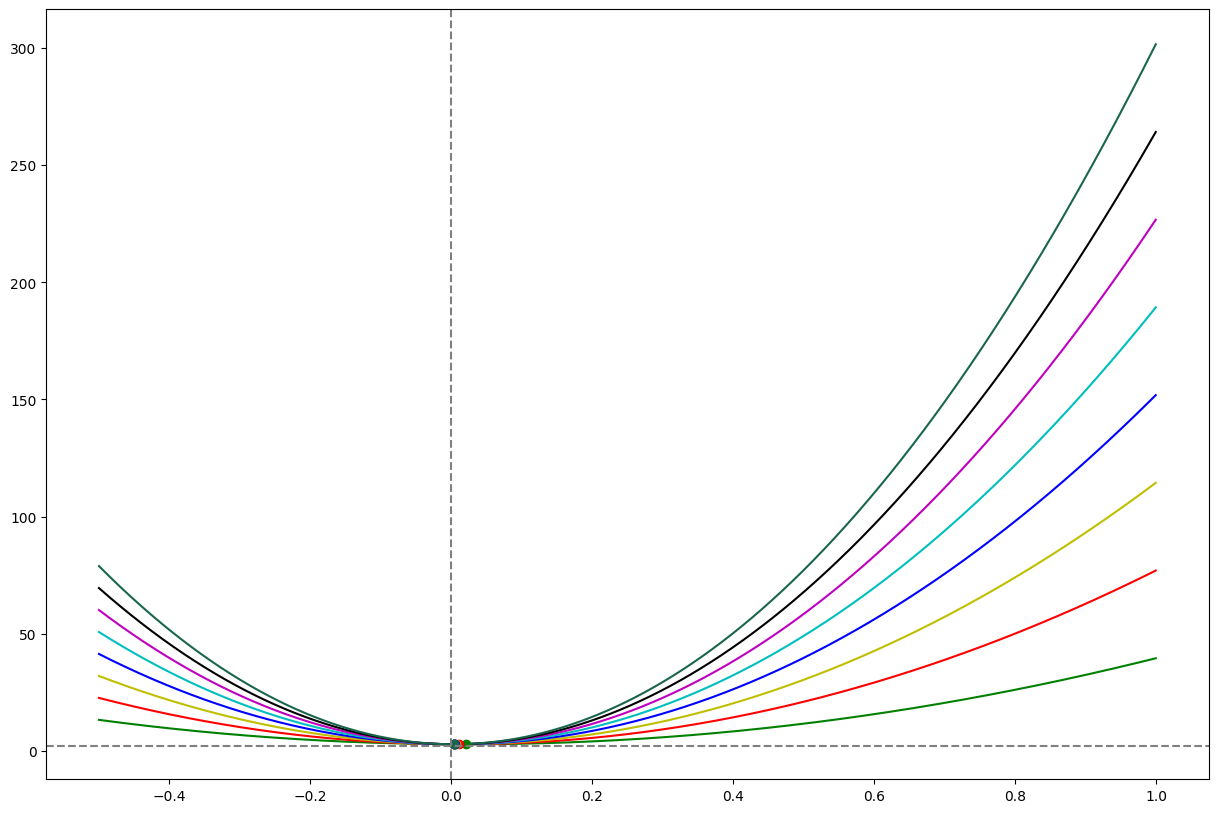

In [10]:

interation = np.arange(-0.5, 1, 0.001)

costf1 = []
costf2 = []
costf3 = []
costf4 = []
costf5 = []
costf6 = []
costf7 = []
costf8 = []
costf9 = []

for i in interation:
    data1 = costfunction(X, y, i, i, 1)
    costf1.append(data1)
    data2 = costfunction(X, y, i, i, 2)
    costf2.append(data2)
    data3 = costfunction(X, y, i, i, 3)
    costf3.append(data3)
    data4 = costfunction(X, y, i, i, 4)
    costf4.append(data4)
    data5 = costfunction(X, y, i, i, 5)
    costf5.append(data5)
    data6 = costfunction(X, y, i, i, 6)
    costf6.append(data6)

    data7 = costfunction(X, y, i, i, 7)
    costf7.append(data7)
    data8 = costfunction(X, y, i, i, 8)
    costf8.append(data8)
    data9 = costfunction(X, y, i, i, 100)
    costf9.append(data9)


min_costf1 = min(costf1)
min_index_costf1 = costf1.index(min_costf1)
print(min_index_costf1, min_costf1, interation[min_index_costf1])

min_costf2 = min(costf2)
min_index_costf2 = costf2.index(min_costf2)
print(min_index_costf2, min_costf2, interation[min_index_costf2])

min_costf3 = min(costf3)
min_index_costf3 = costf3.index(min_costf3)
print(min_index_costf2, min_costf3, interation[min_index_costf3])

min_costf4 = min(costf4)
min_index_costf4 = costf4.index(min_costf4)
print(min_index_costf4, min_costf4, interation[min_index_costf4])

min_costf5 = min(costf5)
min_index_costf5 = costf5.index(min_costf5)
print(min_index_costf5, min_costf5, interation[min_index_costf5])

min_costf6 = min(costf6)
min_index_costf6 = costf6.index(min_costf6)
print(min_index_costf6, min_costf6, interation[min_index_costf6])

min_costf7 = min(costf7)
min_index_costf7 = costf7.index(min_costf7)
print(min_index_costf7, min_costf7, interation[min_index_costf7])

min_costf8 = min(costf8)
min_index_costf8 = costf8.index(min_costf8)
print(min_index_costf8, min_costf8, interation[min_index_costf8])

min_costf9 = min(costf9)
min_index_costf9 = costf9.index(min_costf9)
print(min_index_costf9, min_costf9, interation[min_index_costf9])


plt.figure(figsize=(15,10))
plt.plot(interation, costf1, '-g', )
plt.plot(interation, costf2, '-r')
plt.plot(interation, costf3, '-y')
plt.plot(interation, costf4, '-b')
plt.plot(interation, costf5, '-c')
plt.plot(interation, costf6, '-m')
plt.plot(interation, costf7, '-k')
plt.plot(interation, costf8, color=(0.1,0.4,0.3))
# plt.plot(interation, costf9, color=(0.8,0.7,0.7))

plt.plot(interation[min_index_costf1], min_costf1, 'go')
plt.plot(interation[min_index_costf2], min_costf2, 'ro')
plt.plot(interation[min_index_costf3], min_costf3, 'yo')
plt.plot(interation[min_index_costf4], min_costf4, 'bo')
plt.plot(interation[min_index_costf5], min_costf5, 'co')
plt.plot(interation[min_index_costf6], min_costf6, 'mo')

plt.plot(interation[min_index_costf7], min_costf7, 'ko')
plt.plot(interation[min_index_costf8], min_costf8, color=(0.1,0.4,0.3), marker='o')
# plt.plot(interation[min_index_costf9], min_costf9, color=(0.8,0.7,0.7), marker='o')

plt.axvline(x=0, color='gray', linestyle='--')  

plt.axhline(y=2, color='gray', linestyle='--') 

